In [2]:
from pathlib import Path
import pydicom
import matplotlib.pyplot as plt

In [13]:
dicom_file = pydicom.read_file("../imgs/ct_dicom_dir/ID_0000_AGE_0060_CONTRAST_1_CT.dcm")

In [14]:
print(dicom_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

In [15]:
dicom_file[0x0028, 0x0010]

(0028, 0010) Rows                                US: 512

In [16]:
dicom_file.Rows

512

In [17]:
ct = dicom_file.pixel_array

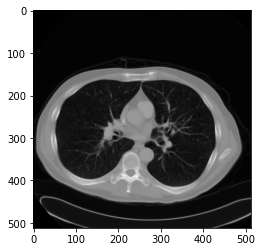

In [18]:
plt.imshow(ct, cmap="gray")

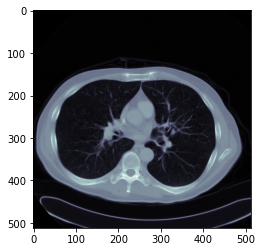

In [19]:
plt.imshow(ct, cmap="bone")

In [21]:
path_to_head_mri = Path("../imgs/mri_dicom_dir/SE000001/")

In [23]:
all_files = list(path_to_head_mri.glob("*"))

In [24]:
all_files

[WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000000'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000001'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000002'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000003'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000004'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000005'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000006'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000007'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000008'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000009'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000010'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000011'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000012'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000013'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000014'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000015'),
 WindowsPath('../imgs/mri_dicom_dir/SE000001/MR000016'),
 WindowsPath('../imgs/mri_dicom

In [25]:
mri_data = []

for path in all_files:
    data = pydicom.read_file(path)
    mri_data.append(data)

In [27]:
len(mri_data)

27

In [30]:
for slice in mri_data[0:5]:
    print(slice.SliceLocation)

0.0
5.99999663091323
11.9999973042441
17.9999979772582
23.9999946081714


In [4]:
type(dicom_file)

pydicom.dataset.FileDataset

In [10]:
dicom_file[0x008,0x0030]

(0008, 0030) Study Time                          TM: '103630.723000'

In [7]:
dicom_file.Rows

256

In [8]:
mri = dicom_file.pixel_array

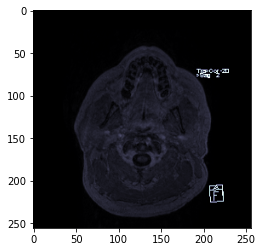

In [16]:
plt.imshow(mri, cmap="bone")

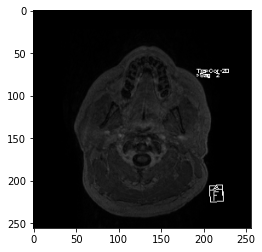

In [13]:
plt.imshow(mri, cmap="gray")

In [17]:
path_to_head_mri = Path("imgs/")

In [20]:
all_files = list(path_to_head_mri.glob("*"))

In [21]:
all_files

[WindowsPath('imgs/1-001.dcm'),
 WindowsPath('imgs/1-002.dcm'),
 WindowsPath('imgs/1-003.dcm'),
 WindowsPath('imgs/1-004.dcm'),
 WindowsPath('imgs/1-005.dcm'),
 WindowsPath('imgs/1-006.dcm'),
 WindowsPath('imgs/1-007.dcm'),
 WindowsPath('imgs/1-008.dcm'),
 WindowsPath('imgs/1-009.dcm'),
 WindowsPath('imgs/1-010.dcm')]

In [29]:
mri_data = []

for path in all_files:
    data = pydicom.read_file(path)
    mri_data.append(data)

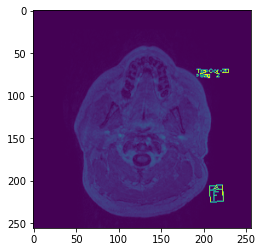

In [36]:
plt.imshow(mri_data[0].pixel_array)

In [40]:
full_volume = []
for mri in mri_data:
    full_volume.append(mri.pixel_array)

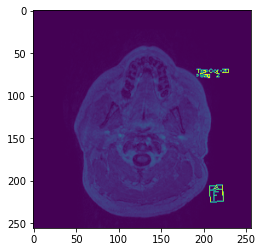

In [42]:
plt.imshow(full_volume[0])

## Display all images

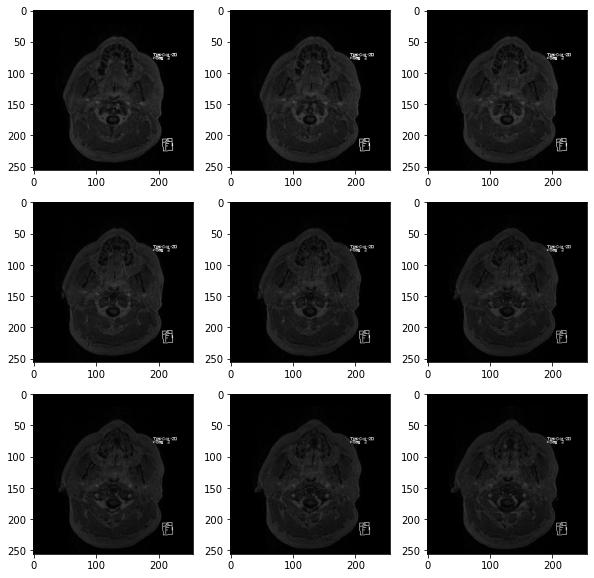

In [46]:
fig, axis = plt.subplots(3,3, figsize=(10,10))

mri_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(full_volume[mri_counter], cmap="gray")
        mri_counter += 1

In [55]:
import SimpleITK as sitk

In [56]:
series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(str(path_to_head_mri))
print(series_ids)

('1.3.6.1.4.1.14519.5.2.1.125028729667929862870977139505755680512',)


In [57]:
series_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(str(path_to_head_mri), series_ids[0])
series_file_names

('imgs\\1-001.dcm',
 'imgs\\1-002.dcm',
 'imgs\\1-003.dcm',
 'imgs\\1-004.dcm',
 'imgs\\1-005.dcm',
 'imgs\\1-006.dcm',
 'imgs\\1-007.dcm',
 'imgs\\1-008.dcm',
 'imgs\\1-009.dcm',
 'imgs\\1-010.dcm')

In [60]:
series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_names)

In [61]:
image_data = series_reader.Execute()

In [62]:
head_mri = sitk.GetArrayFromImage(image_data)

In [63]:
head_mri.shape

(10, 256, 256)

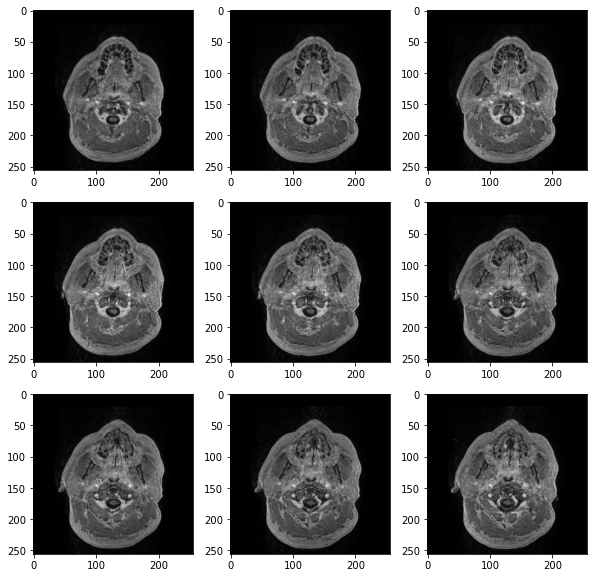

In [64]:
fig, axis = plt.subplots(3,3, figsize=(10,10))

mri_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(head_mri[mri_counter], cmap="gray")
        mri_counter += 1